# Hello Treebeard!

Thanks for trying out Treebeard's cloud deploy and scheduling service.  
Here are a few simple examples that you might want to schedule.

In [73]:
# Setup
import matplotlib.pyplot as plt 
import requests
import json
import pandas as pd
%matplotlib inline

# Call an API

What's the current price of BitCoin?

In [71]:
r = requests.get('https://api.coindesk.com/v1/bpi/currentprice.json').json()
print(f"At {r['time']['updateduk']}, the price of Bitcoin is £{r['bpi']['GBP']['rate']}")
# This data was produced from the CoinDesk Bitcoin Price Index (USD). Non-USD currency data converted using hourly conversion rate from openexchangerates.org

At Feb 6, 2020 at 16:15 GMT, the price of Bitcoin is £7,593.0650


See the last 30 days of the price of Bitcoin, thanks to CoinDesk's API

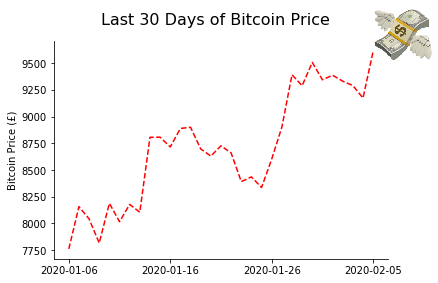

In [75]:
r = requests.get('https://api.coindesk.com/v1/bpi/historical/close.json').json()

fig, ax = plt.subplots()
ax.plot(pd.DataFrame.from_dict(r)['bpi'][:-2], color='red', linestyle='--')
ax.set_ylabel('Bitcoin Price (£)')
fig.suptitle('Last 30 Days of Bitcoin Price', size=16)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
ax.xaxis.set_major_locator(plt.MaxNLocator(4))

im = plt.imread('https://emojipedia-us.s3.dualstack.us-west-1.amazonaws.com/thumbs/320/apple/237/money-with-wings_1f4b8.png')
newax = fig.add_axes([0.8, 0.8, 0.2, 0.2], anchor='NE')
newax.imshow(im)
newax.axis('off')

plt.savefig('bitcoin_price.png', dpi=150, bbox_inches='tight')
plt.show()